# This notebook will take your regression or classification problem, the y variables (dependent) and x variables (independent) and determine which have what level of contribution to your dataset.
## This will allow you to visualize the information context of Xn to Y, and decide what to keep in future analyses, such as development of lienar regression

In [1]:
#Imports
from sklearn.ensemble import RandomForestRegressor #This is for regression problems, use RandomForestClassifier for classifications (1 or 0)
import pandas as pd
from matplotlib import pyplot as plt
import os
import glob as glob
from pathlib import Path
import numpy as np
import platform


In [2]:
## Paths Input Here
analysis = 'random_forest/dim_reduction'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/basal_forebrain_analysis/composite_rois/matrix_corrMx_T (13)_revised_with_clinical_data_dataframe.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(conn_path.split('.')[0], f'{analysis}')
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMy_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matriy_corrMy_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    y_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matriy_corrMy_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

I have set pathnames in the Mac style


## Import Pre-prepared CSV

In [3]:
data_df = pd.read_csv(conn_path)

#Prepare the dataframe for statsmodels
# data_df = data_df.reset_index(drop=True)
# data_df.dropna(inplace=True)

#remove variables
try:
    data_df.pop('Baseline CDR (sum of squares)')
    data_df.pop('Unnamed: 0')
    data_df.pop('% Change from baseline (CDR)')
    data_df.pop('Age at DOS')
    data_df.pop('Baseline ADAS-Cog11')
    data_df.pop('Randomization Arm')
    data_df.pop('Patient # CDR, ADAS')
except:
    print('none to pop')
    
try:
    data_df.pop('age')
    data_df.pop('Patient # CDR, ADAS')
    data_df.pop('baseline')
    data_df.pop('Randomization Arm')
except:
    print('non to pop')
#Remove outlier
outlier_index=[11, 47, 48, 49]
data_df = data_df.drop(index=outlier_index)
data_df.reset_index(drop=True, inplace=True)
    
# data_df = data_df.rename(columns={'% Change from baseline (ADAS-Cog11)': 'percent_change_adascog11'})#, '07_default': 'default', '02_somatomotor_seed': 'somatomotor', '03_dorsal_attention': 'dorsal', '01_visual_seed': 'visual', '04_ventral_attention': 'ventral', '05_limbic': 'limbic', '06_frontoparietal': 'frontoparietal'})
display(data_df)

non to pop


,% Change from baseline (ADAS-Cog11),Ch1 & 2,Ch3,Ch4,Ch4 Posterior
0,-21.428571,91.642643,141.708962,9.706712,3.517256
1,-36.363636,88.390049,140.132287,10.678287,2.067991
2,-78.947368,123.657550,149.681613,11.608715,5.960432
3,-129.411765,76.902967,144.247639,13.196687,6.605538
4,-10.526316,28.782581,44.716590,8.451477,5.365328
5,-38.461538,122.258681,126.567746,11.041787,5.144210
6,-15.384615,34.454203,55.334996,7.798575,6.116742
7,-29.166667,34.224590,51.837980,11.205555,7.149969
8,-30.434783,166.762833,134.084288,17.799853,7.632425
9,-84.615385,122.686276,85.683044,15.826267,8.648263


## Begin Modelliong

In [4]:

#Model
model = RandomForestRegressor(random_state=1, max_depth=5)
# data_df.pop('Ch1-2 Left')
# data_df.pop('Ch1-2 Right')
# data_df.pop('Ch4 Posterior Left')
# data_df.pop('Ch4 Posterior Right')

model.fit(data_df.iloc[:,1:], data_df.iloc[:,1])


RandomForestRegressor(max_depth=5, random_state=1)

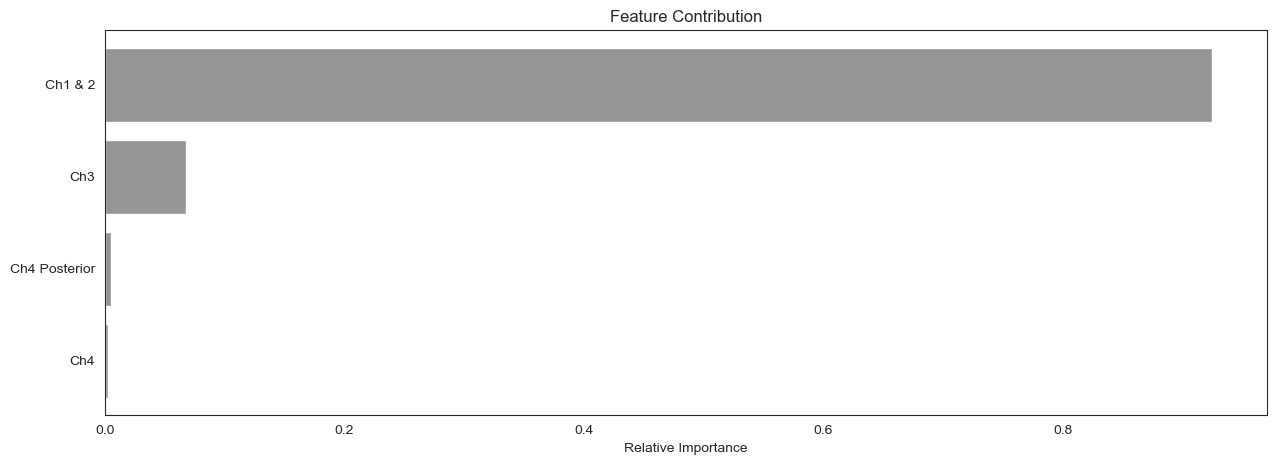

In [5]:
#Styling
import seaborn as sns
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)

#extract feature importance
features = data_df.columns.values.tolist()[1:]
importances = model.feature_importances_
indices = np.argsort(importances)

#plot
figure = plt.figure(figsize=(15,5))
plt.title('Feature Contribution')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [12]:
named = [features[i] for i in indices]
importance_df  = pd.DataFrame({'Name': named, 'Feature Contribution': importances[indices]})
display(importance_df)

,Name,Feature Contribution
0,cluster_1,0.029432
1,cluster_7,0.033982
2,cluster_4,0.048296
3,cluster_8,0.060899
4,cluster_9,0.064493
5,cluster_3,0.064956
6,memory_roi,0.074513
7,cluster_2,0.085396
8,cluster_5,0.108037
9,cluster_6,0.156005


In [13]:
#Save outcomes
if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)
    
figure.savefig(os.path.join(out_dir, 'relative_import_plot.png'))
importance_df.to_csv(os.path.join(out_dir, 'feature_contribution.csv'))
print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/non_overlap_map_analysis/random_forest_nonoverlap_rois_memory_roi


# Continue to Perform Sub-Analyses By a Third Variable

In [14]:
index_column = 'percent_change_adascog11'
metric_val = 0
index_one = data_df[index_column] >= metric_val
index_two = data_df[index_column] < metric_val

index_one_df = data_df[index_one]
index_two_df = data_df[index_two]

In [21]:
#Generate and fit model >65
model = RandomForestRegressor(random_state=1, max_depth=10)
df = pd.get_dummies(index_one_df.iloc[:,1:]) #generate dummies from the x_values
model.fit(index_one_df.iloc[:, 1:], index_one_df.iloc[:, 0]) #fit x then y

RandomForestRegressor(max_depth=10, random_state=1)

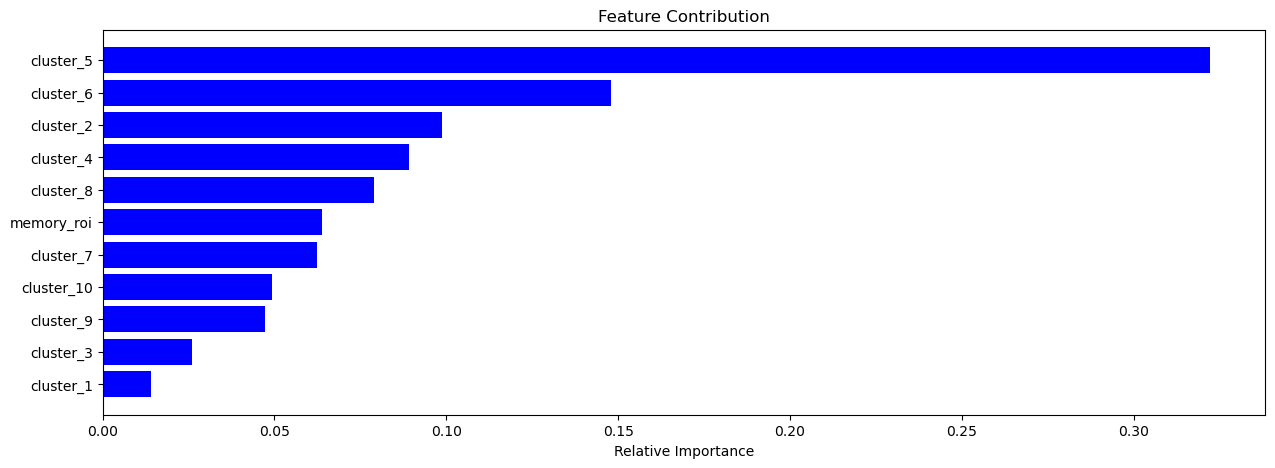

In [22]:
#Plot feature importance graph >65
features = index_one_df.columns.values.tolist()[1:]
importances = model.feature_importances_
indices = np.argsort(importances)
figure2 = plt.figure(figsize=(15,5))
plt.title('Feature Contribution')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
named = [features[i] for i in indices]
index_one_importance_df  = pd.DataFrame({'Name': named, 'Feature Contribution': importances[indices]})
display(index_one_importance_df)

,Name,Feature Contribution
0,cluster_1,0.014204
1,cluster_3,0.025884
2,cluster_9,0.047311
3,cluster_10,0.049339
4,cluster_7,0.062329
5,memory_roi,0.063872
6,cluster_8,0.078873
7,cluster_4,0.089243
8,cluster_2,0.098880
9,cluster_6,0.147957


In [27]:
#Save outcomes
if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)
    
figure.savefig(os.path.join(out_dir, 'relative_import_plot_top_responders.png'))
index_one_importance_df.to_csv(os.path.join(out_dir, 'feature_contribution_top_responders.csv'))
print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/non_overlap_map_analysis/random_forest_nonoverlap_rois_memory_roi


In [25]:
#Generate and fit model <=65
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(index_two_df.iloc[:,1:], index_two_df.iloc[:,0])

RandomForestRegressor(max_depth=10, random_state=1)

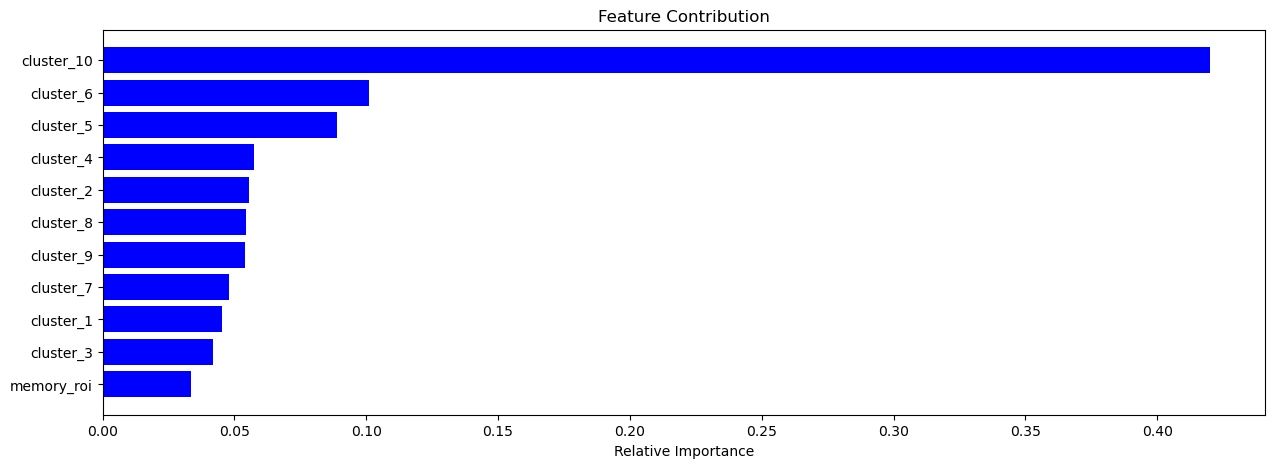

In [26]:
#Plot feature importance graph <=65
features = index_two_df.columns.values.tolist()[1:]
importances = model.feature_importances_
indices = np.argsort(importances)

figure3 = plt.figure(figsize=(15,5))
plt.title('Feature Contribution')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
named = [features[i] for i in indices]
index_two_importance_df  = pd.DataFrame({'Name': named, 'Feature Contribution': importances[indices]})
display(index_two_importance_df)

,Name,Feature Contribution
0,memory_roi,0.033674
1,cluster_3,0.041786
2,cluster_1,0.045418
3,cluster_7,0.048006
4,cluster_9,0.054161
5,cluster_8,0.054346
6,cluster_2,0.055628
7,cluster_4,0.057283
8,cluster_5,0.088745
9,cluster_6,0.101021


In [30]:
#Save outcomes
if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)
    
figure.savefig(os.path.join(out_dir, 'relative_import_plot_bottom_responders.png'))
index_two_importance_df.to_csv(os.path.join(out_dir, 'feature_contribution_bottom_responders.csv'))
print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/non_overlap_map_analysis/random_forest_nonoverlap_rois_memory_roi
